CNN - IMAGE CLASSIFICATION **without Dropout Layer**

In [ ]:
%tensorflow_version 2.x

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
!git clone https://github.com/mesushan/CNN-for-image-Classification.git

Cloning into 'CNN-for-image-Classification'...
remote: Enumerating objects: 10026, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 10026 (delta 0), reused 13 (delta 0), pack-reused 10012
Receiving objects: 100% (10026/10026), 216.96 MiB | 49.61 MiB/s, done.
Resolving deltas: 100% (1/1), done.
Updating files: 100% (10007/10007), done.


In [ ]:
! ls

CNN-for-image-Classification  sample_data


In [ ]:
import tensorflow as tf

In [ ]:
# Initialising the CNN
model = tf.keras.models.Sequential()

In [ ]:
# 32 feature detectors with 3*3 dimensions so the convolution layer compose of 32 feature maps
# 128 by 128 dimensions with colored image(3 channels)  (tensorflow backend)
input_size = (128, 128)
model.add(tf.keras.layers.Convolution2D(32, 3, 3, input_shape = (*input_size, 3), activation = 'relu'))

In [ ]:
# reduce the size of feature maps and therefore reduce the number of nodes in the future fully connected layer (reduce time complexity, less compute intense without losing the performace). 2 by 2 deminsion is the recommended option
model.add(tf.keras.layers.MaxPooling2D(pool_size = (2, 2)))

In [ ]:
model.add(tf.keras.layers.Convolution2D(32, 3, 3, activation = 'relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size = (2, 2)))

In [ ]:
# flatten all the feature maps in the pooling layer into single vector
model.add(tf.keras.layers.Flatten())

In [ ]:
# making classic ann which compose of fully connected layers
# number of nodes in hidden layer (output_dim) (common practice is to take the power of 2)
model.add(tf.keras.layers.Dense(units = 64, activation = 'relu'))
#model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

In [ ]:
# Compiling the CNN
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
# image augmentation technique to enrich our dataset(training set) without adding more images so get good performance  results with little or no overfitting even with the small amount of images
# used from keras documentation (flow_from_directory method)

from keras.preprocessing.image import ImageDataGenerator
batch_size = 32
# image augmentation part
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

# create training set
# wanna get higher accuracy -> inccrease target_size
training_set = train_datagen.flow_from_directory('/content/CNN-for-image-Classification/dataset/training_set',
                                                 target_size = input_size,
                                                 batch_size = batch_size,
                                                 class_mode = 'binary')

# create test set
# wanna get higher accuracy -> inccrease target_size
test_set = test_datagen.flow_from_directory('/content/CNN-for-image-Classification/dataset/test_set',
                                            target_size = input_size,
                                            batch_size = batch_size,
                                            class_mode = 'binary')

# fit the cnn model to the trainig set and testing it on the test set
history=model.fit(training_set,
          steps_per_epoch = 8000/batch_size,
          epochs = 35,
          validation_data = test_set,
          validation_steps = 2000/batch_size)

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Epoch 1/35
250/250 [==============================] - 35s 136ms/step - loss: 0.6806 - accuracy: 0.5546 - val_loss: 0.6414 - val_accuracy: 0.6320
Epoch 2/35
250/250 [==============================] - 42s 169ms/step - loss: 0.6409 - accuracy: 0.6308 - val_loss: 0.6611 - val_accuracy: 0.5745
Epoch 3/35
250/250 [==============================] - 34s 136ms/step - loss: 0.6057 - accuracy: 0.6678 - val_loss: 0.6112 - val_accuracy: 0.6655
Epoch 4/35
250/250 [==============================] - 35s 141ms/step - loss: 0.5887 - accuracy: 0.6874 - val_loss: 0.5897 - val_accuracy: 0.6855
Epoch 5/35
250/250 [==============================] - 34s 134ms/step - loss: 0.5589 - accuracy: 0.7113 - val_loss: 0.5479 - val_accuracy: 0.7250
Epoch 6/35
250/250 [==============================] - 34s 137ms/step - loss: 0.5521 - accuracy: 0.7188 - val_loss: 0.5374 - val_accuracy: 0.7250
Epoch 7/35
250/250 [==========================

In [ ]:
import numpy as np
from keras.preprocessing import image

In [ ]:
test_image = image.load_img('/content/CNN-for-image-Classification/dataset/single_prediction/cat_or_dog_4.jpg', target_size= input_size)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)


1/1 [==============================] - 0s 81ms/step


In [ ]:
training_set.class_indices

{'cats': 0, 'dogs': 1}

In [ ]:
if result [0][0] == 1:
  prediction = 'dog'
else:
  prediction = 'cat'

In [ ]:
prediction

'cat'

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam

from sklearn.metrics import classification_report,confusion_matrix

import tensorflow as tf

import cv2
import os

import numpy as np

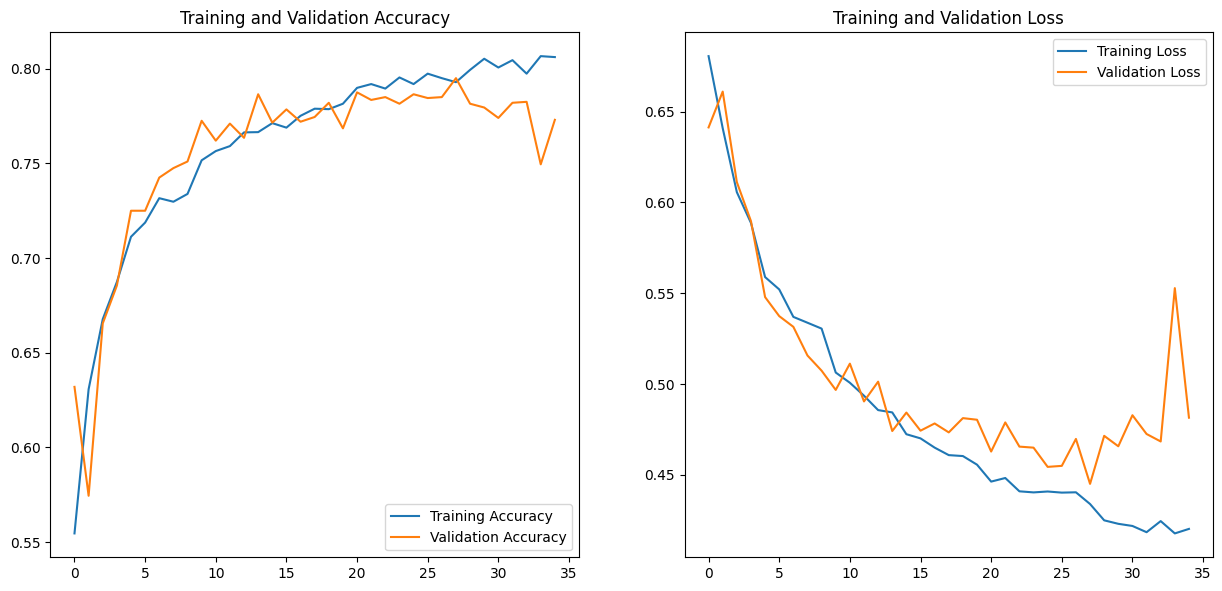

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(35)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()